In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stree import Stree
from n_network import N_Network, plot_decision_boundary

In [2]:
def load_planar_dataset(random_seed):
    np.random.seed(random_seed)
    m = 400 # number of examples
    N = int(m / 2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m, 1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N * j, N * (j + 1))
        t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2 # theta
        r = a * np.sin(4 * t) + np.random.randn(N) * 0.2 # radius
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T
    return X, Y

In [3]:
random_seed = 1
Xtrain, ytrain = load_planar_dataset(random_seed)
X = Xtrain.T
y = ytrain.T
print('X', X.shape, 'y', y.shape)

X (400, 2) y (400, 1)


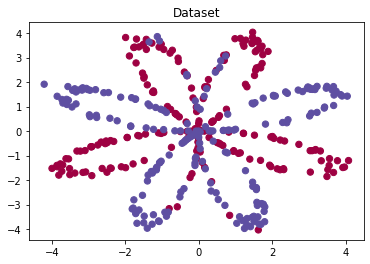

In [4]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y.T[0], s=40, cmap=plt.cm.Spectral);
plt.title('Dataset')
plt.show();

In [5]:
#Define a four layer network
nu = [X.shape[1], 10, 7, 5, 1]
xg = [0, N_Network.relu, N_Network.relu, N_Network.relu, N_Network.sigmoid]
xgprime = [0, N_Network.relu_prime, N_Network.relu_prime, N_Network.relu_prime, N_Network.sigmoid_prime]
init_params = dict(m=X.shape[0], n=X.shape[1], n_units=nu, g=xg, optim='sgd',
                   gprime=xgprime, epochs=10000, alpha=0.075)
nd = N_Network(init_params)
nd.set_seed(random_seed)

First cost: 0.803754 final cost: 0.185819
Number of units in each layer:  [2, 10, 7, 5, 1]
Elapsed time: 10.19 s


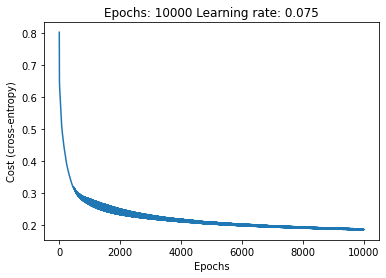

In [6]:
costs = nd.train(X, y)
print("First cost: {0:.6f} final cost: {1:.6f}".format(costs[0], costs[-1]))
print("Number of units in each layer: ", nu)
nd.print_time()
nd.plot_costs()

Accuracy: 89.750% (359 of 400)


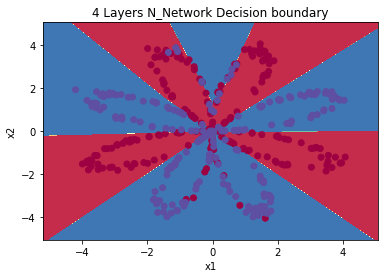

In [7]:
pred = nd.valid(X, y)
indices = nd.mislabeled(y, pred)
# Plot decission boundary
plot_decision_boundary(nd, X, y, True, '4 Layers N_Network')

In [8]:
st = Stree(C=25, max_iter=10000)
st.fit(X, y)
st.score(X, y)

0.83

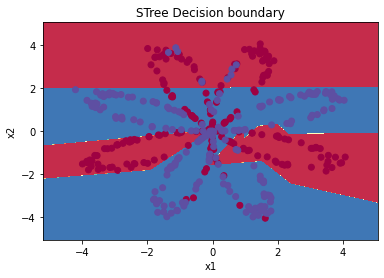

In [9]:
plot_decision_boundary(st, X, y, True, title='STree')

In [10]:
print(st)

root
root - Down
root - Down - Down
root - Down - Down - Down, <cgaf> - Leaf class=1 belief=0.883333 counts=(array([0, 1], dtype=uint8), array([ 7, 53]))
root - Down - Down - Up
root - Down - Down - Up - Down, <pure> - Leaf class=1 belief=1.000000 counts=(array([1], dtype=uint8), array([2]))
root - Down - Down - Up - Up, <pure> - Leaf class=0 belief=1.000000 counts=(array([0], dtype=uint8), array([16]))
root - Down - Up
root - Down - Up - Down
root - Down - Up - Down - Down, <pure> - Leaf class=1 belief=1.000000 counts=(array([1], dtype=uint8), array([2]))
root - Down - Up - Down - Up, <pure> - Leaf class=0 belief=1.000000 counts=(array([0], dtype=uint8), array([7]))
root - Down - Up - Up
root - Down - Up - Up - Down, <cgaf> - Leaf class=0 belief=0.789474 counts=(array([0, 1], dtype=uint8), array([15,  4]))
root - Down - Up - Up - Up
root - Down - Up - Up - Up - Down
root - Down - Up - Up - Up - Down - Down, <cgaf> - Leaf class=1 belief=0.735294 counts=(array([0, 1], dtype=uint8), arra